<a href="https://colab.research.google.com/github/Abhijith-py/supervised-machinelearning/blob/main/linear-regression-with-gradient-descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression with Gradient Descent - Coursera**

automate the process of optimizing w and b using gradient descent

In [46]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

A house with 1000 square feet sold for \$300,000 and a house with 2000 square feet sold for \$500,000.

Use it to predict price of houses.

In [47]:
x_train = np.array((1.0, 2.0))
y_train = np.array((300.0, 500.0))

In [48]:
#defining a function to calculate cost
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = w*x[i] + b
    cost = cost + (f_wb- y[i])**2
    total_cost = 1/(2*m) * cost

    return total_cost


In [49]:
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_i = (f_wb - y[i])*x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i

  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw, dj_db


In [50]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):

  w=w_in
  b=b_in
  j_history = []
  p_history = []

  for i in range(10000):
    dj_dw,dj_db = compute_gradient(x,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db

    if i < 100000:
      j_history.append(compute_cost(x,y,w,b))
      p_history.append([w,b])

    if i%math.ceil(num_iters/10) == 0:
      print(f"Iteration {i,4}: Cost: {j_history[-1]}", f"dj_dw: {dj_dw}", f"dj_db: {dj_db}")

  return w,b,j_history,p_history


In [51]:
w_init = 0
b_init = 0
tmp_alpha = 0.1
num_iters = 10000

w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, num_iters, compute_cost, compute_gradient)

print(f"w = {w_final}, b = {b_final}")

Iteration (0, 4): Cost: 9506.25 dj_dw: -650.0 dj_db: -400.0
Iteration (1000, 4): Cost: 4.583677323999856e-06 dj_dw: -0.0005091243228321218 dj_db: 0.0008237804589157349
Iteration (2000, 4): Cost: 2.0031740254522858e-12 dj_dw: -3.365705651958706e-07 dj_db: 5.445826900540851e-07
Iteration (3000, 4): Cost: 8.754272142498901e-19 dj_dw: -2.2248514142120257e-10 dj_db: 3.6001779335492756e-10
Iteration (4000, 4): Cost: 3.90972086402017e-25 dj_dw: -1.7053025658242404e-13 dj_db: 2.2737367544323206e-13
Iteration (5000, 4): Cost: 6.54312789226516e-26 dj_dw: -1.4210854715202004e-13 dj_db: 5.684341886080802e-14
Iteration (6000, 4): Cost: 6.54312789226516e-26 dj_dw: -1.4210854715202004e-13 dj_db: 5.684341886080802e-14
Iteration (7000, 4): Cost: 6.54312789226516e-26 dj_dw: -1.4210854715202004e-13 dj_db: 5.684341886080802e-14
Iteration (8000, 4): Cost: 6.54312789226516e-26 dj_dw: -1.4210854715202004e-13 dj_db: 5.684341886080802e-14
Iteration (9000, 4): Cost: 6.54312789226516e-26 dj_dw: -1.42108547152020

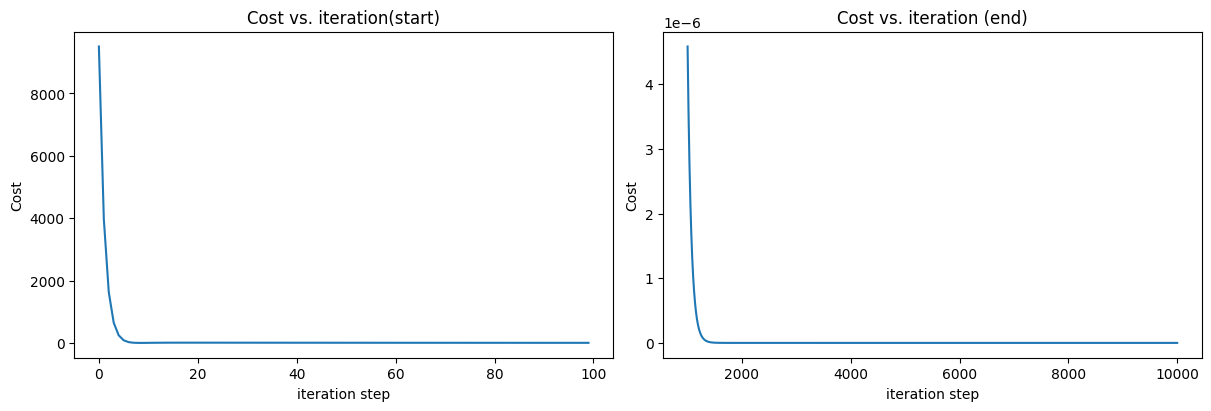

In [52]:
#cost vs iteration check to see if j is converging
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [53]:
prediction_x_scaled = 1200/1000 # Scale 1200 sq ft to 1.2 (thousands of sq ft)
prediction_y_thousands = w_final * prediction_x_scaled + b_final # Prediction in thousands of dollars
print(f"1200 square feet house prediction: ${(prediction_y_thousands * 1000):,.0f}")

1200 square feet house prediction: $340,000


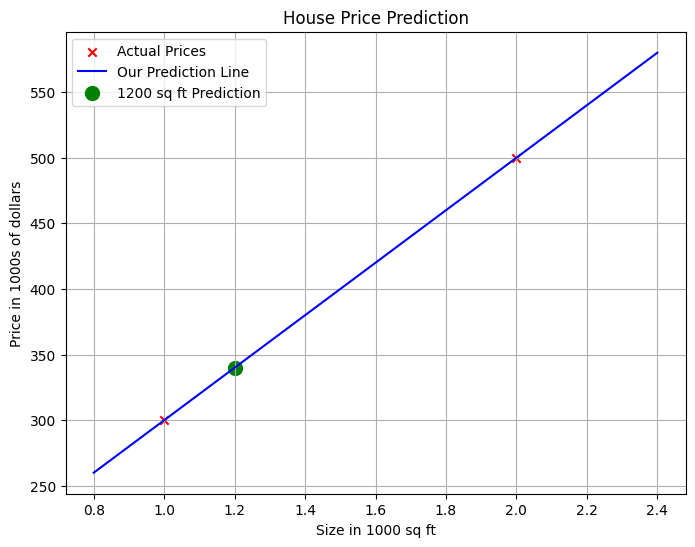

In [54]:
# Plotting the training data
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, marker='x', c='red', label='Actual Prices')

# Plotting the regression line
x_plot = np.linspace(min(x_train) * 0.8, max(x_train) * 1.2, 100) # Generate x values for the line
y_plot = w_final * x_plot + b_final
plt.plot(x_plot, y_plot, c='blue', label='Our Prediction Line')

# Plotting the prediction for 1200 sq ft
plt.scatter(prediction_x_scaled, prediction_y_thousands, marker='o', c='green', s=100, label='1200 sq ft Prediction')

plt.title('House Price Prediction')
plt.xlabel('Size in 1000 sq ft')
plt.ylabel('Price in 1000s of dollars')
plt.legend()
plt.grid(True)
plt.show()